## Homework following intro to python lesson 5
### In lesson five, we covered:
* intro to datetime
* intro to linear regression w/ python
***

### Q. 1: Load the apple data from the last homework ('apple.csv') and use datetime to answer the following questions:

* what is the mean opening price for apple stock from January through March?
* how many days closed higher than 143 in April of 2016?
* generate a plot of the closing price for Apple stock from May through August
* plot the mean closing prices by month for the same time period

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
apple = pd.read_csv('apple.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,115.800003,116.330002,114.760002,116.150002,114.722694,28781900
1,2017-01-04,115.849998,116.510002,115.750000,116.019997,114.594292,21118100
2,2017-01-05,115.919998,116.860001,115.809998,116.610001,115.177040,22193600
3,2017-01-06,116.779999,118.160004,116.470001,117.910004,116.461075,31751900
4,2017-01-09,117.949997,119.430000,117.940002,118.989998,117.527794,33387600


In [2]:
#convert the Date column to datetime:

apple['Date'] = pd.to_datetime(apple['Date'])

# set the new datetime column to the index, delete the old column:

apple.index = apple['Date']
del apple['Date']
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,114.722694,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,114.594292,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,115.177040,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,116.461075,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,117.527794,33387600


In [3]:
print('mean opening price between January and March:',round(apple['2017-01':'2017-03']['Open'].mean(),2))

mean opening price between January and March: 131.32


In [4]:
# apple['2017-04']
result = apple['2017-04']['Close'][apple['2017-04']['Close'] > 143].count()
print('there were', result, 'days in April of 2017 that closed higher than 143')

there were 11 days in April of 2017 that closed higher than 143


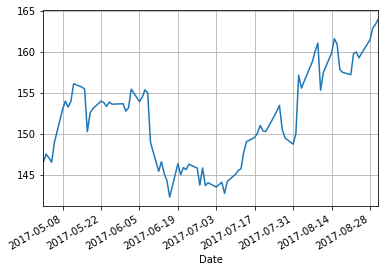

In [30]:
# generate a plot of the closing price for Apple stock from May through August
apple['2017-05':'2017-08']['Close'].plot(grid=True)

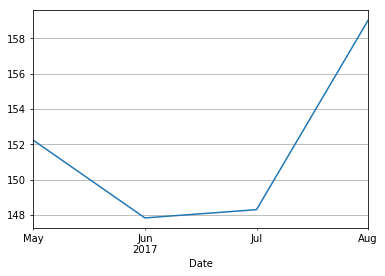

In [33]:
# plot the mean closing prices by month for the same time period
apple['2017-05':'2017-08']['Close'].resample('M').mean().plot(grid=True)

### Q. 2: Load the Boston housing dataset from session 4 to answer the following linear regression questions:

* is AGE a significant predictor of median home value?
* how much variance does age account for in this simple model?
* generate a scatterplot w/ the linear regression line representing age as a predictor of home value
* use this simple model to generate a predicted value for a home that is 64 years old
* perform a multiple linear regression analysis w/ the following features: CRIM, NOX, AGE, DIS, TAX, and INDUS
    * be prepared to discuss this more complex model compared to the simple age model

In [10]:
from sklearn import datasets
import statsmodels.formula.api as smf
import seaborn as sns

boston = datasets.load_boston()
data = boston.data
column_names = boston.feature_names
#species_names = boston.target_names

MEDV = boston.target # median values (target)

boston_df = pd.DataFrame(boston.data, columns= column_names)
boston_df['MEDV'] = MEDV

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# is AGE a significant predictor of median home value?

# create a fitted model in one line
lm = smf.ols(formula='MEDV ~ AGE', data=boston_df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sun, 15 Oct 2017   Prob (F-statistic):           1.57e-18
Time:                        11:33:21   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# how much variance does age account for in this simple model?
lm.rsquared

0.14209474407780465

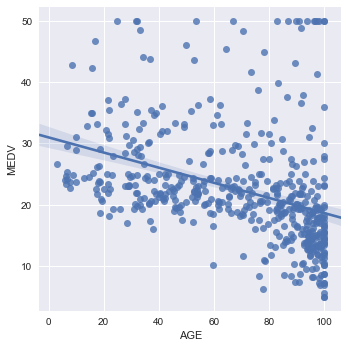

In [12]:
# generate a scatterplot w/ the linear regression line representing age as a predictor of home value

sns.lmplot(x='AGE',y='MEDV',data=boston_df,fit_reg=True)

In [46]:
# use this simple model to generate a predicted value for a home that is 64 years old

X_new = pd.DataFrame({'AGE': [64]})
print(round(lm.predict(X_new)[0],2))

23.1


In [50]:
# perform a multiple linear regression analysis w/ the following features: CRIM, NOX, AGE, DIS, TAX, and INDUS
lm = smf.ols(formula='MEDV ~ CRIM + NOX + AGE + DIS + TAX + INDUS', data=boston_df).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     44.20
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           2.52e-43
Time:                        15:43:37   Log-Likelihood:                -1732.4
No. Observations:                 506   AIC:                             3479.
Df Residuals:                     499   BIC:                             3508.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6458      3.400     14.896      0.000      43.966      57.326
CRIM          -0.2109      0.048     -4.397      0.000      -0.305      -0.117
NOX          -13.7898      5.583     -2.470      0.014     -24.759      -2.820
AGE           -0.0719      0.019     -3.737      0.000      -0.110      -0.034
DIS           -1.8971      0.283     -6.699      0.000      -2.453      -1.341
TAX           -0.0050      0.003     -1.513      0.131      -0.011       0.001
INDUS         -0.4975      0.088     -5.625      0.000      -0.671      -0.324
==============================================================================
Omnibus:                      200.989   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.570
Skew:                           1.845   Prob(JB):                    1.25e-157
Kurtosis:                       7.545   Cond. No.                     8.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""